In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import time

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../../dataset/stroke_prediction_dataset/healthcare-dataset-stroke-data.csv')

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [6]:
df.shape

(5110, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
print(df[df.duplicated(keep=False)])

df.drop_duplicates(inplace=True)

Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [10]:
df["bmi"] = df["bmi"].fillna(df['bmi'].mean())

In [11]:
df.columns.tolist()

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [12]:
df.drop(columns = ['id'], inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [13]:
df_unique = {col:df[col].value_counts().shape[0] for col in df.columns.tolist()}
df_unique = pd.DataFrame(df_unique, index=["unique_count"]).transpose()
df_unique = df_unique.reset_index().rename(columns={'index':'columns'})
df_unique

,columns,unique_count
0,gender,3
1,age,104
2,hypertension,2
3,heart_disease,2
4,ever_married,2
5,work_type,5
6,Residence_type,2
7,avg_glucose_level,3979
8,bmi,419
9,smoking_status,4


In [14]:
df['ever_married']=(df['ever_married']=='Yes') * 1
df['Residence_type']=(df['Residence_type']=='Urban') * 1

In [15]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,Female,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1


In [16]:
columns = df.columns.tolist()
columns_out = ['stroke']
columns_con = df_unique[df_unique['unique_count'] > 10]['columns'].tolist()
columns_cat = list(set(columns) - set(columns_con) - set(columns_out))

print(f'categorical columns: {columns_cat}')
print(f'continuous columns: {columns_con}')

categorical columns: ['work_type', 'gender', 'hypertension', 'Residence_type', 'ever_married', 'heart_disease', 'smoking_status']
continuous columns: ['age', 'avg_glucose_level', 'bmi']


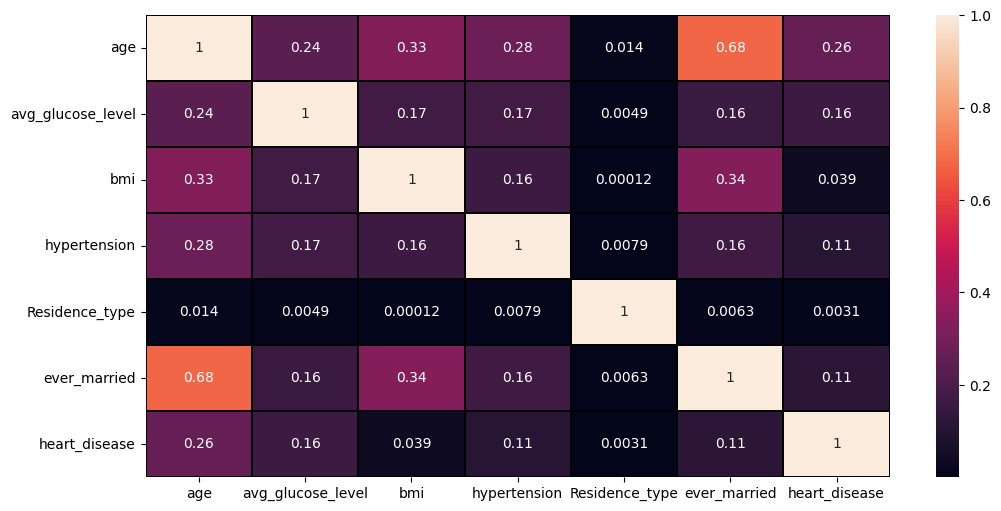

In [17]:
# analyze correlation and remove columns if needed
plt.figure(figsize=(12,6))
corr_matrix = df[columns_con+columns_cat].corr().abs()
sns.heatmap(corr_matrix, linewidths=0.1, linecolor='black', annot=True)
plt.show()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
if len(to_drop):
    print(f'We are dropping these columns beacause of having high correlation with other column(s): {to_drop}')
    for individual_element_to_drop in to_drop:
        if individual_element_to_drop in columns_cat:
            columns_cat.remove(individual_element_to_drop)
        if individual_element_to_drop in columns_con:
            columns_cat.remove(individual_element_to_drop)

    # Drop features 
    df.drop(to_drop, axis=1, inplace=True)
    columns = df.columns.to_list()

<Figure size 3200x3200 with 0 Axes>

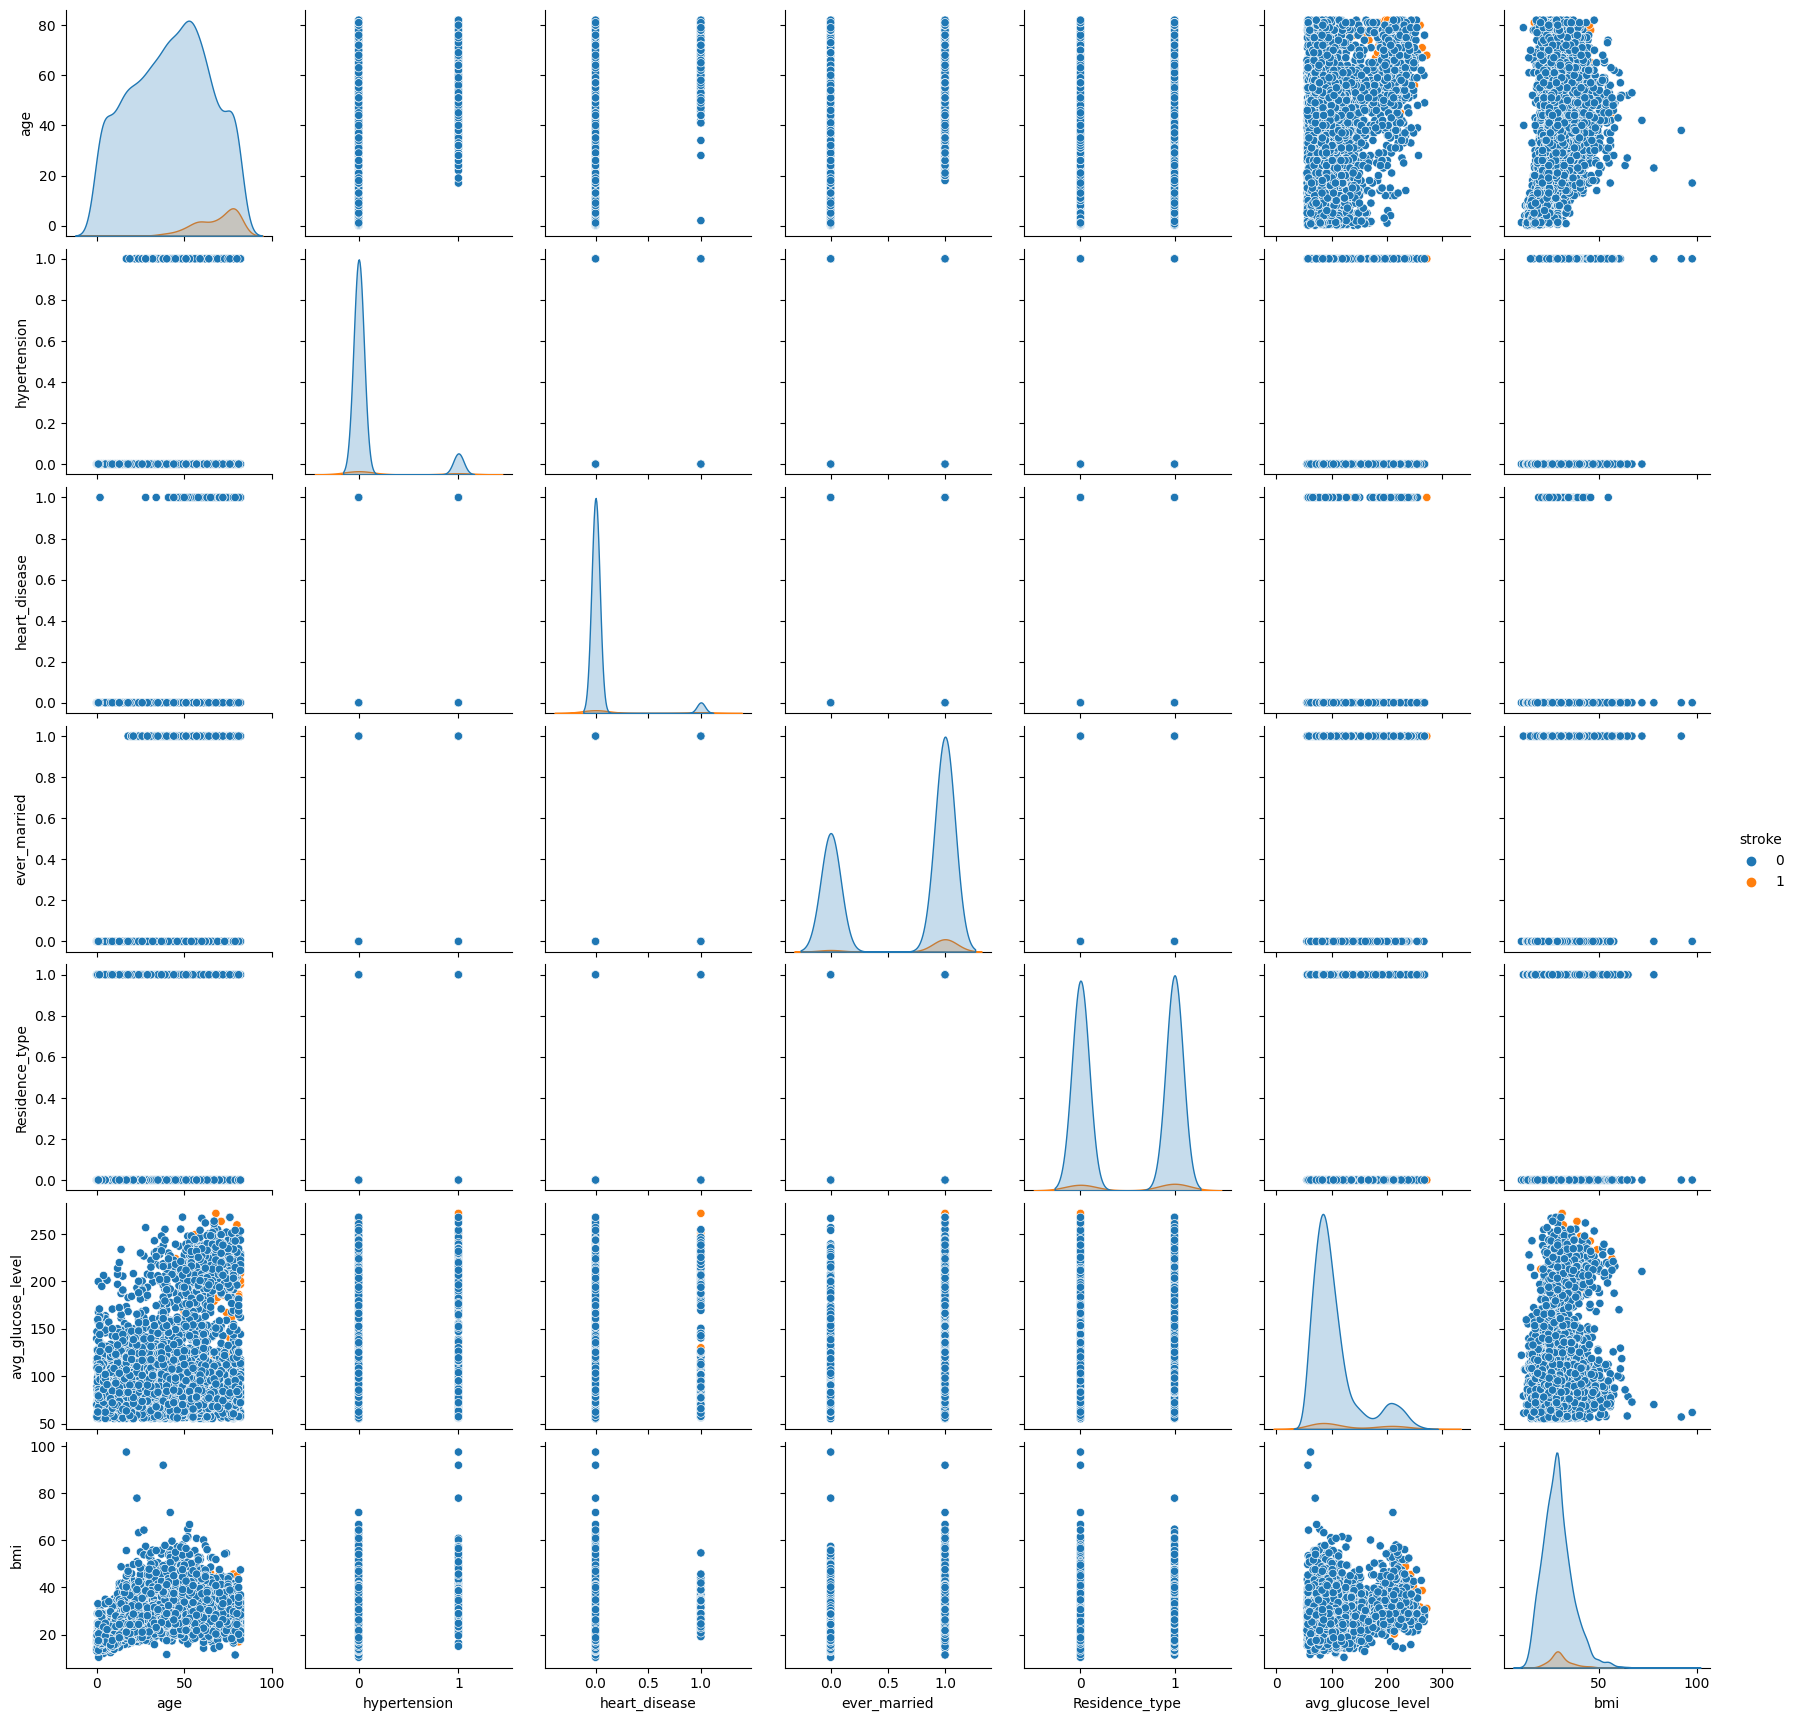

In [18]:
# pairplot
for output in columns_out:
    fig = plt.figure(figsize=(32,32))
    sns.pairplot(df,hue=output)
    plt.show()

In [19]:
# cat plot 1
fig, axss = plt.subplots(nrows=len(columns_cat), ncols=len(columns_con),  figsize=(4*len(columns_cat), 5*len(columns_con)))
# axss = axs.ravel()
for output in columns_out:
    for i, axs in enumerate(axss):
        for j, ax in enumerate(axs):
            x = columns_cat[i]
            y = columns_con[j]
#             sns.catplot(x=x, y=y,hue=output ,kind="swarm", data=df, ax=ax)
            sns.swarmplot(x=x, y=y,hue=output , data=df, ax=ax)
#             plt.close(2)
            ax.set_xlabel(f'{x}', size = 22)
            ax.set_ylabel(f'{y}', size = 22)
            ax.tick_params(axis='both', which='major', labelsize=18)
            ax.grid()
#             plt.close(4)
    #         ax.legend(fontsize = 18)
    fig.tight_layout()
    plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fc36f2b10e0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# cat plot 2
fig, axss = plt.subplots(nrows=len(columns_cat), ncols=len(columns_con),  figsize=(4*len(columns_cat), 7*len(columns_con)))
# axss = axs.ravel()
for output in columns_out:
    for i, axs in enumerate(axss):
        for j, ax in enumerate(axs):
            x = columns_cat[i]
            y = columns_con[j]
#             sns.catplot(x=x, y=y,hue=output ,kind="swarm", data=df, ax=ax)
            sns.boxplot(x=x, y=y,hue=output , data=df, ax=ax)
#             plt.close(2)
            ax.set_xlabel(f'{x}', size = 22)
            ax.set_ylabel(f'{y}', size = 22)
            ax.tick_params(axis='both', which='major', labelsize=18)
            ax.grid()
#             plt.close(4)
    #         ax.legend(fontsize = 18)
    fig.tight_layout()
    plt.show()

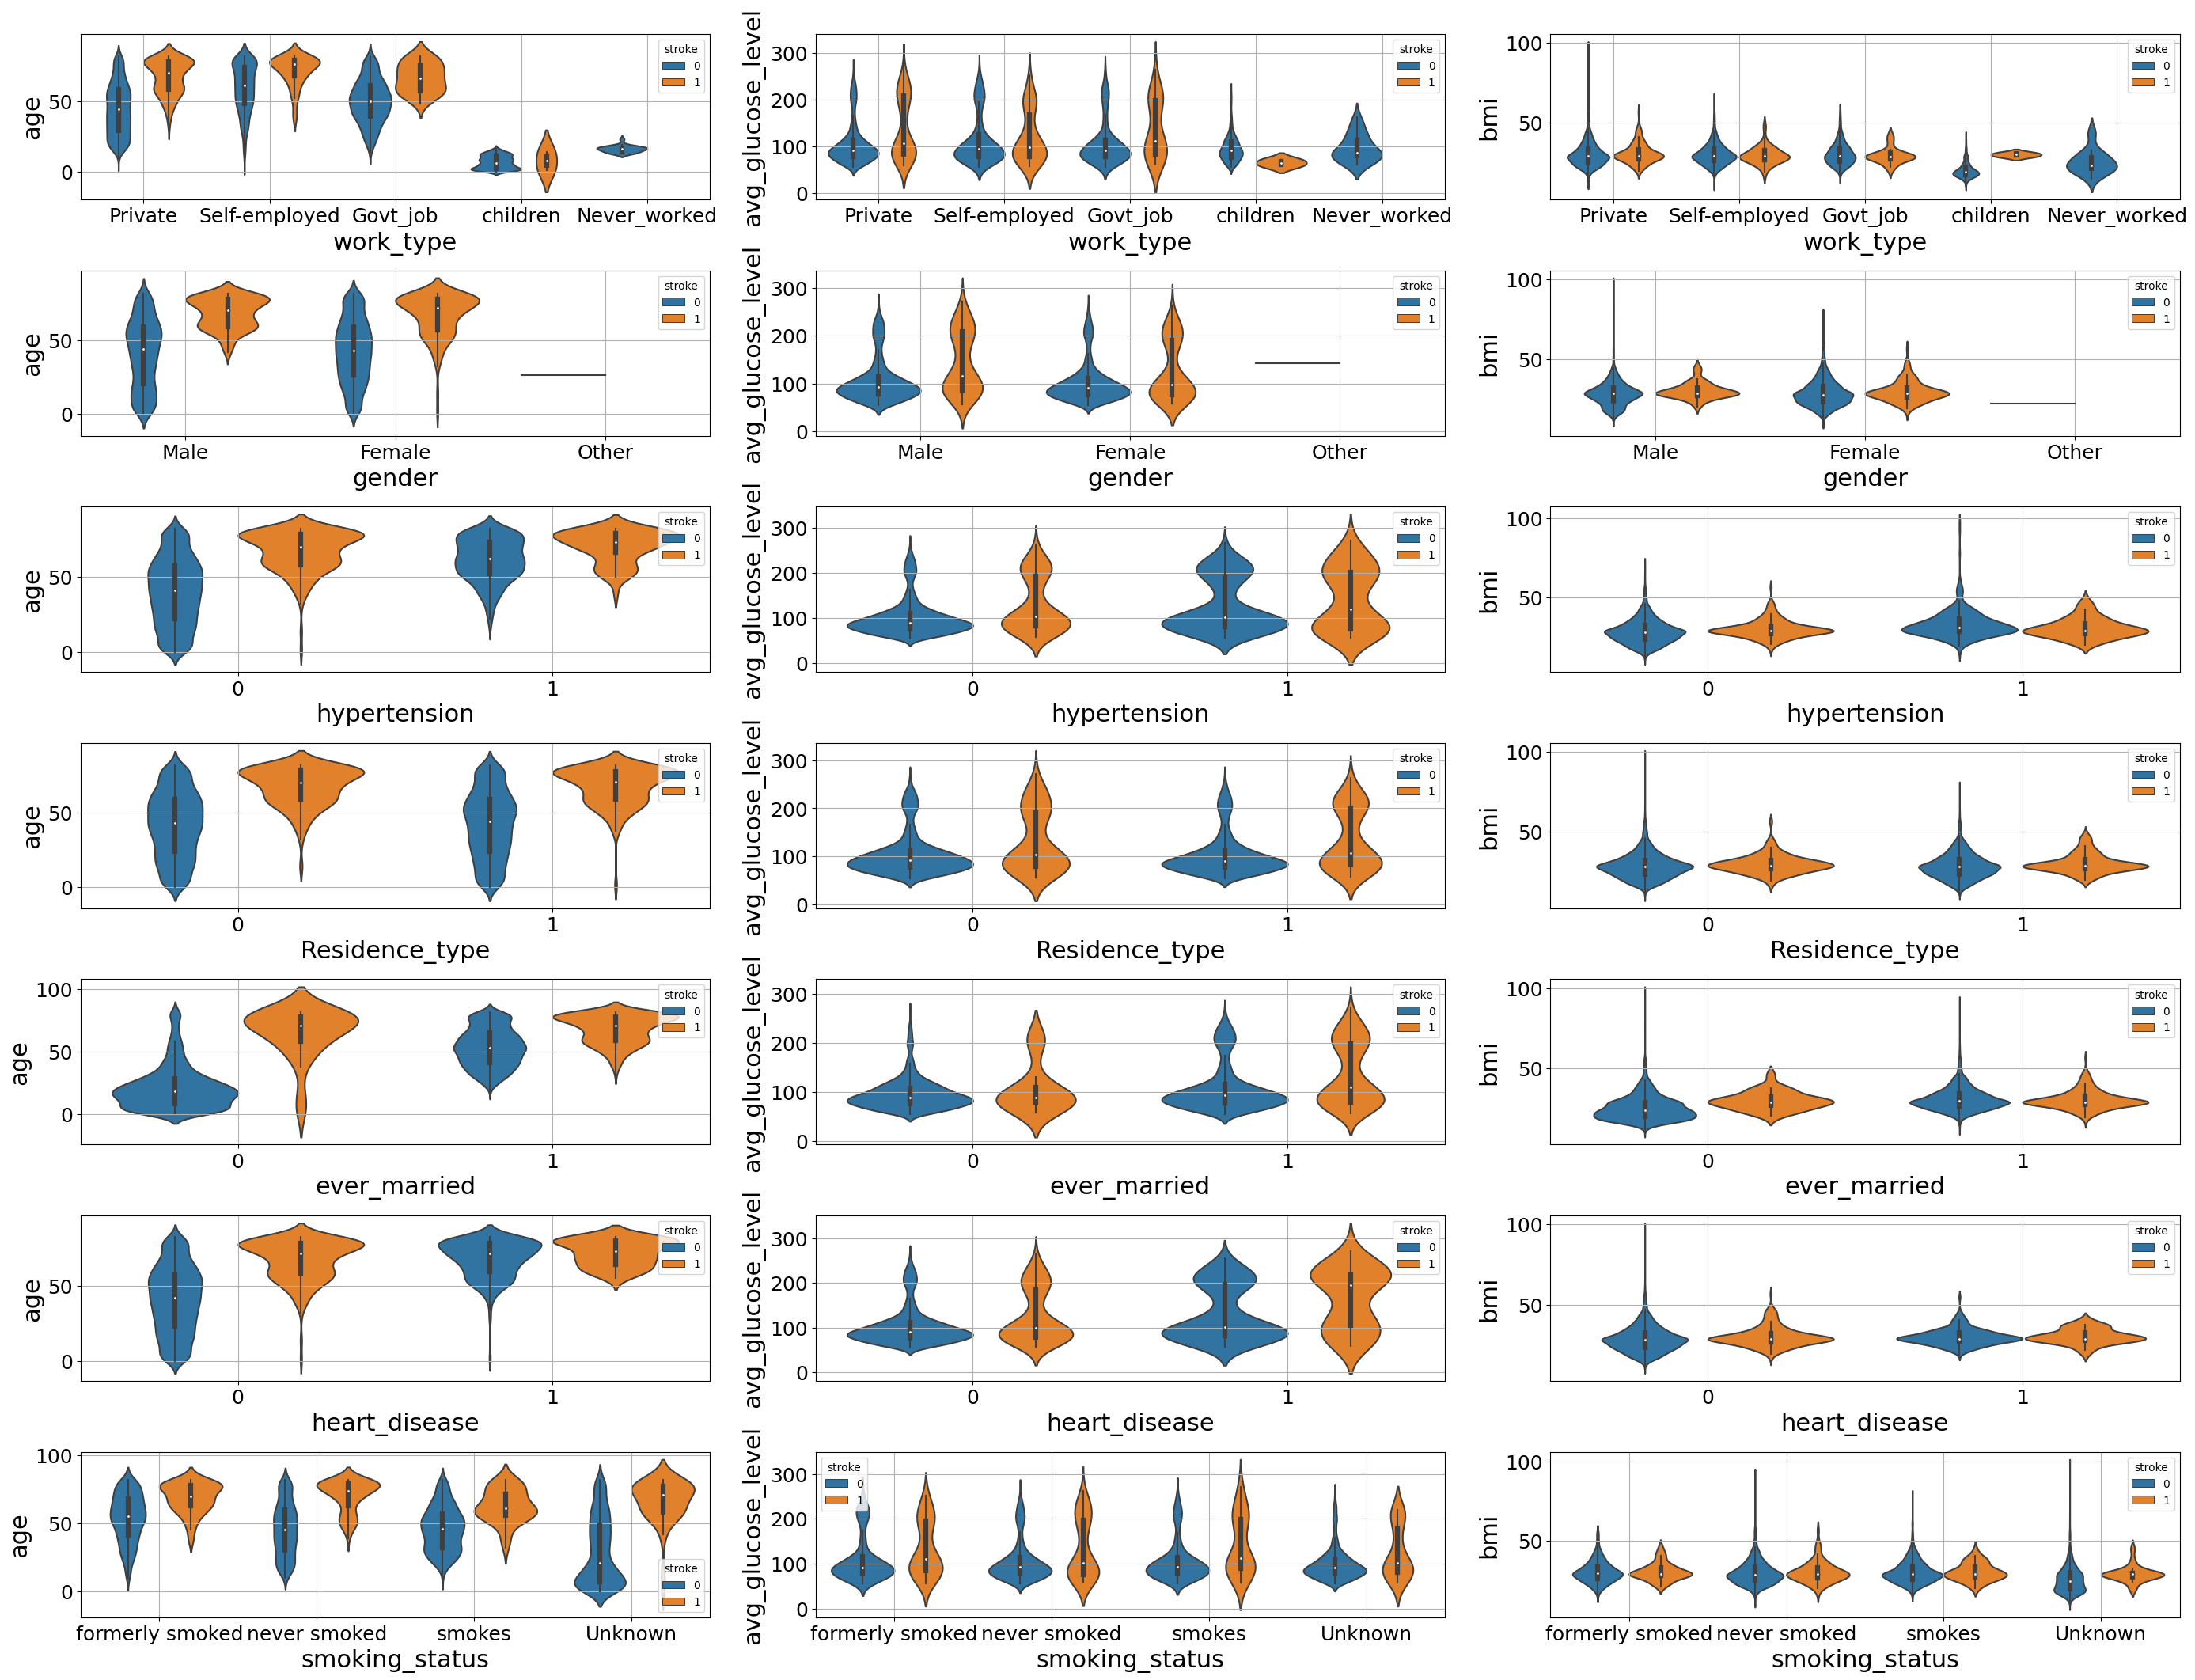

In [20]:
# cat plot 3
fig, axss = plt.subplots(nrows=len(columns_cat), ncols=len(columns_con),  figsize=(4*len(columns_cat), 7*len(columns_con)))
# axss = axs.ravel()
for output in columns_out:
    for i, axs in enumerate(axss):
        for j, ax in enumerate(axs):
            x = columns_cat[i]
            y = columns_con[j]
#             sns.catplot(x=x, y=y,hue=output ,kind="swarm", data=df, ax=ax)
            sns.violinplot(x=x, y=y,hue=output , data=df, ax=ax)
#             plt.close(2)
            ax.set_xlabel(f'{x}', size = 22)
            ax.set_ylabel(f'{y}', size = 22)
            ax.tick_params(axis='both', which='major', labelsize=18)
            ax.grid()
#             plt.close(4)
    #         ax.legend(fontsize = 18)
    fig.tight_layout()
    plt.show()

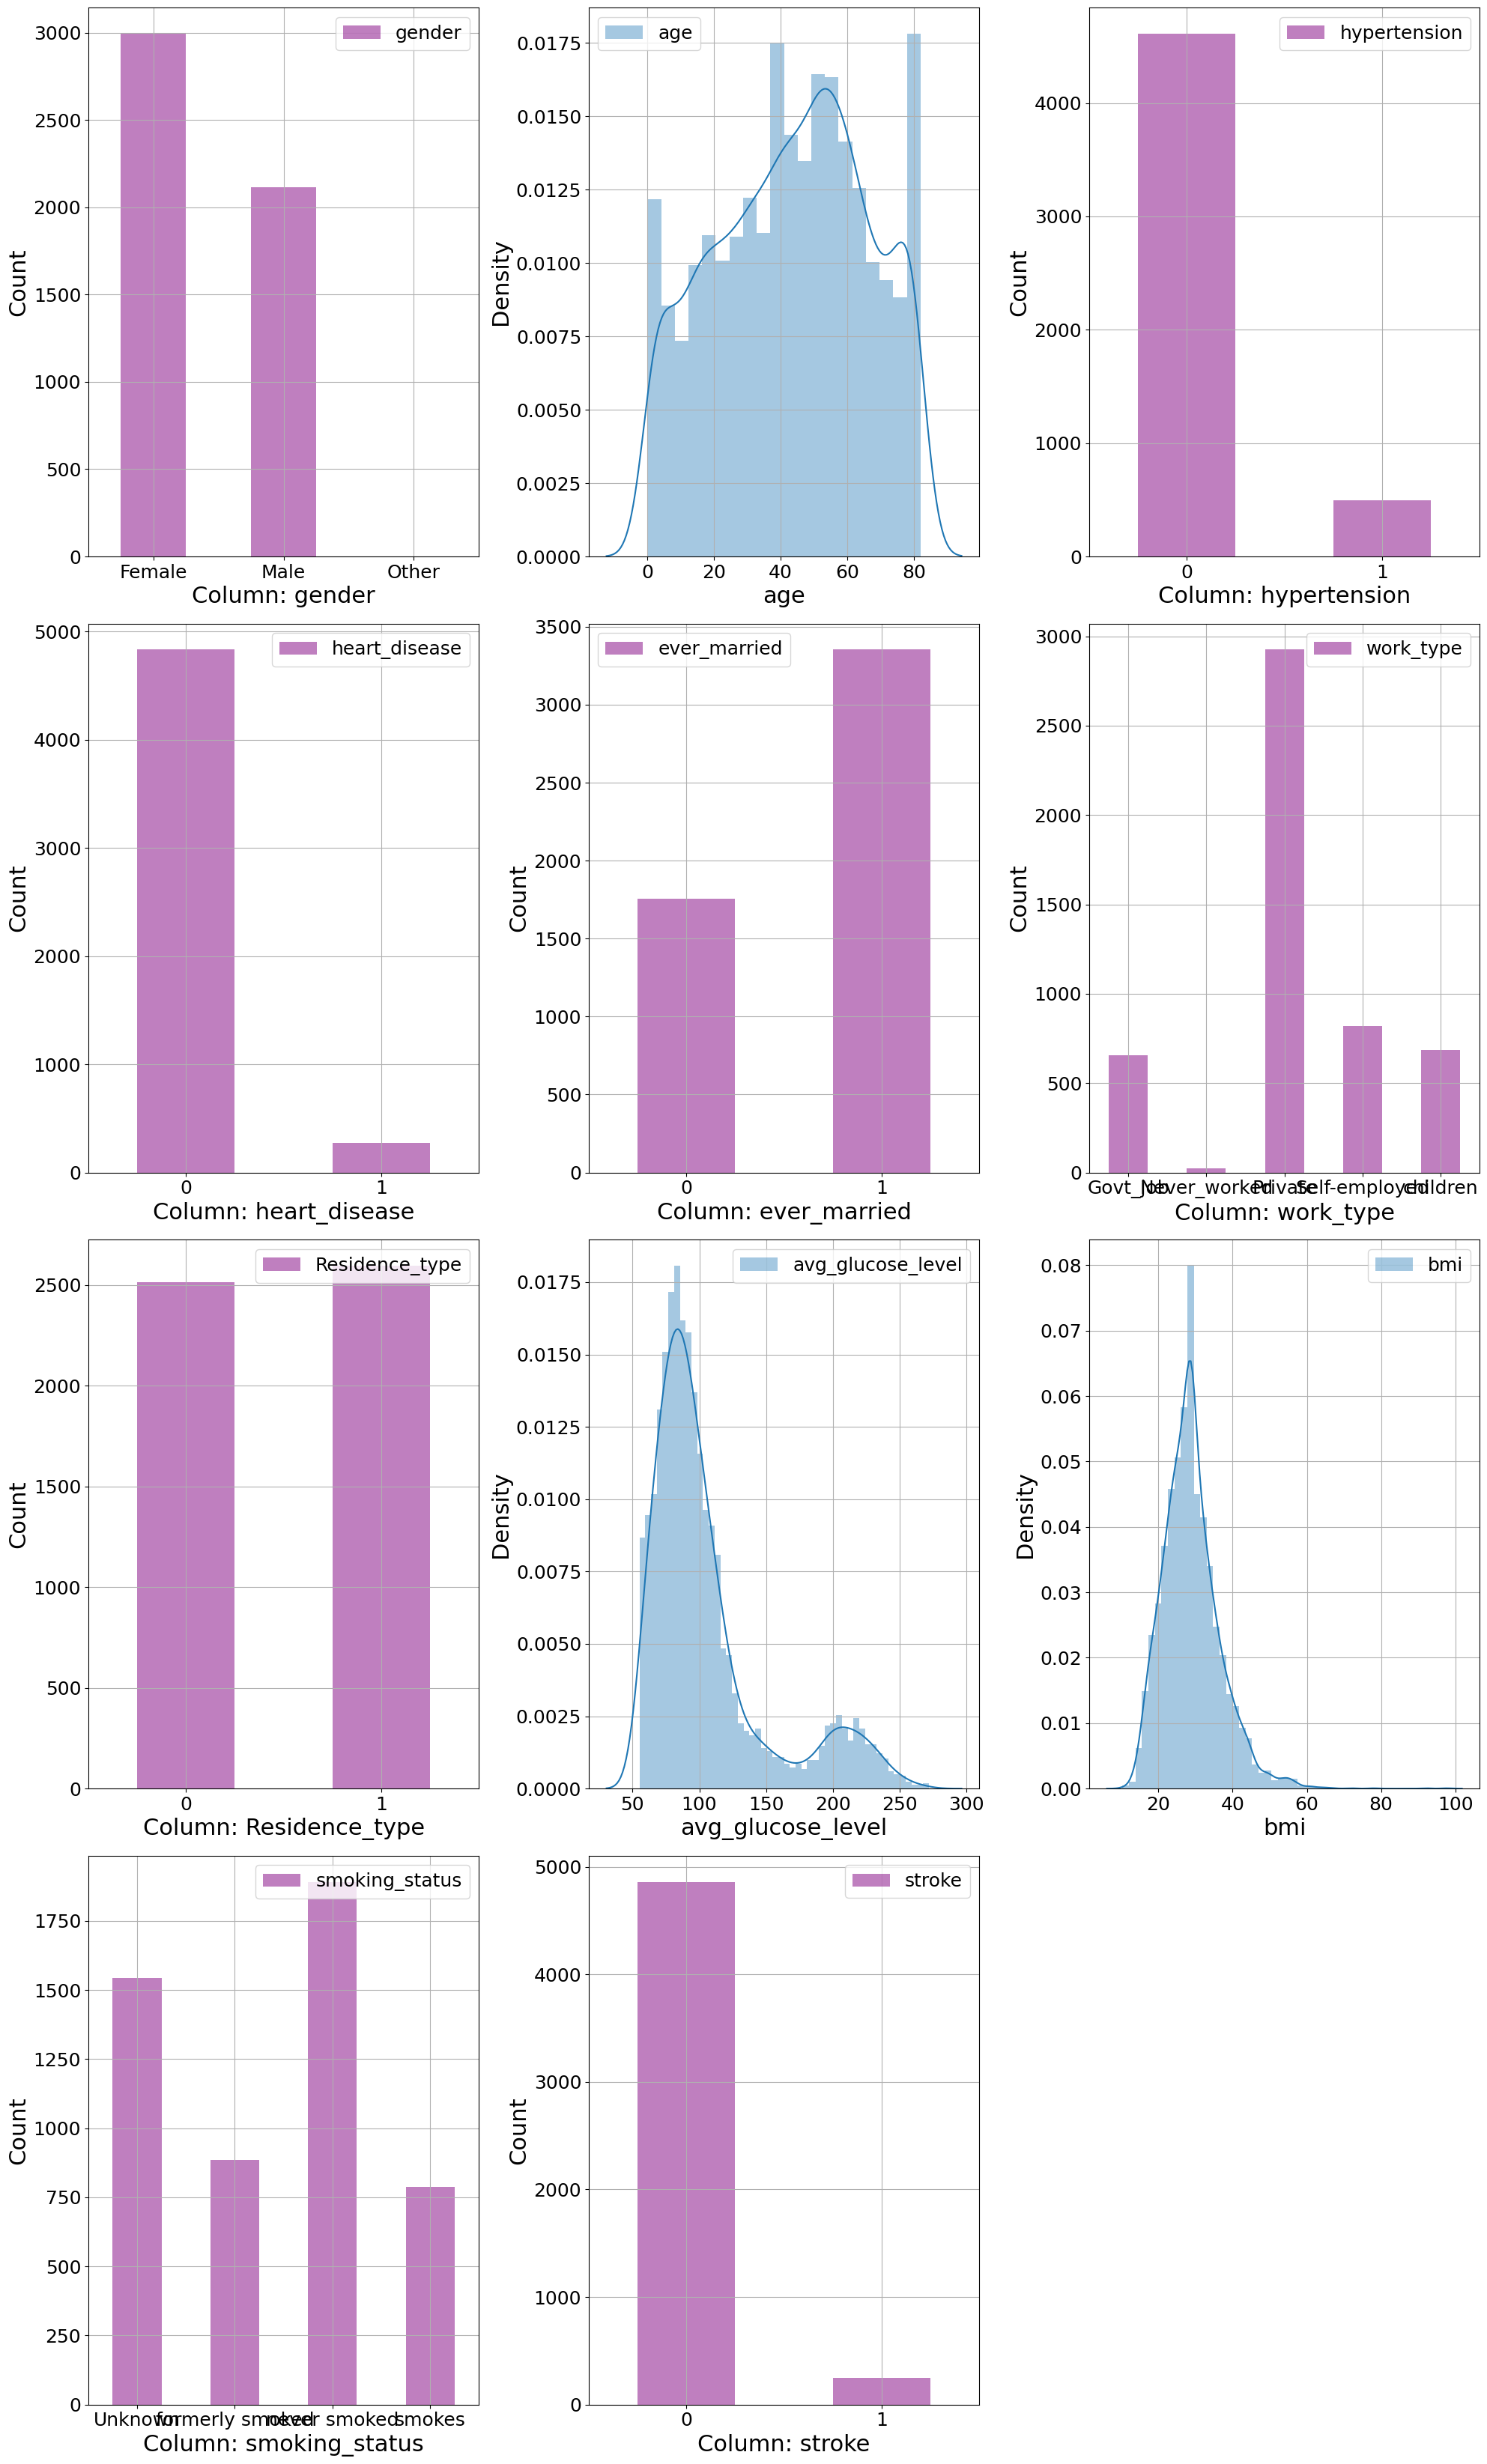

In [23]:
# plot distribution- for categorical variables
# plot density- for continuous variables

fig, axs = plt.subplots(nrows=int(np.ceil(len(columns)/3)), ncols=3,  figsize=(5*int(np.ceil(len(columns)/3)), 33))
axs = axs.ravel()
for i, ax in enumerate(axs[:]):
    try:
#         ax.set_xlabel(f'Values', size=20)
        ax.set_xlabel(f'Column: {columns[i]}', size = 22)
    except:
        ax.axis('off')
        continue
    if columns[i] in columns_con:
        sns.distplot(df[columns[i]], ax=ax, label= columns[i])
        ylabel = 'Density'
    else:
        df[columns[i]].value_counts().sort_index().plot(kind='bar',label=columns[i], ax=ax, alpha=.5, rot=0, color='purple')
        ylabel = 'Count'
    
    ax.set_ylabel(ylabel, size=22)
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.grid()
    ax.legend(fontsize = 18)
    
# plt.legend()
fig.tight_layout()
plt.show()

In [24]:
# one hot encoding for categorical variables having more than 2 unique values
to_do_onehot = [col for col in df_unique['columns'] if ((col in columns_cat) & (col in (df_unique[df_unique['unique_count'] > 2]['columns']).tolist()))]
to_do_onehot_output = [col for col in df_unique['columns'] if ((col in columns_out) & (col in (df_unique[df_unique['unique_count'] > 2]['columns']).tolist()))]

print(f'columns that need one-hot encoding: {to_do_onehot}')

def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    new_cols = []
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
        new_cols+=dummies.columns.to_list()
    return df, new_cols

df, columns_onehot = one_hot(df, to_do_onehot)
df, columns_onehot_output = one_hot(df, to_do_onehot_output)

columns that need one-hot encoding: ['gender', 'work_type', 'smoking_status']


In [198]:
# prepare train and test data
from sklearn.model_selection import train_test_split
columns_X = list(set(columns_con+columns_cat+columns_onehot)-set(to_do_onehot))
columns_y = list(set(columns_out+columns_onehot_output)-set(to_do_onehot_output))
# TODO: split the X and y into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(df[columns_X], df[columns_y], test_size=0.2, random_state= 123)
X_train.reset_index(drop= True, inplace= True)
X_test.reset_index(drop= True, inplace= True)
y_train.reset_index(drop= True, inplace= True)
y_test.reset_index(drop= True, inplace= True)
print(X_train.shape, X_test.shape)

(4088, 19) (1022, 19)


In [199]:
X_train.columns

Index(['avg_glucose_level', 'gender_Other', 'work_type_children',
       'work_type_Private', 'gender_Female', 'gender_Male',
       'work_type_Never_worked', 'age', 'heart_disease',
       'smoking_status_formerly smoked', 'smoking_status_smokes',
       'smoking_status_Unknown', 'work_type_Govt_job',
       'work_type_Self-employed', 'hypertension', 'Residence_type', 'bmi',
       'smoking_status_never smoked', 'ever_married'],
      dtype='object')

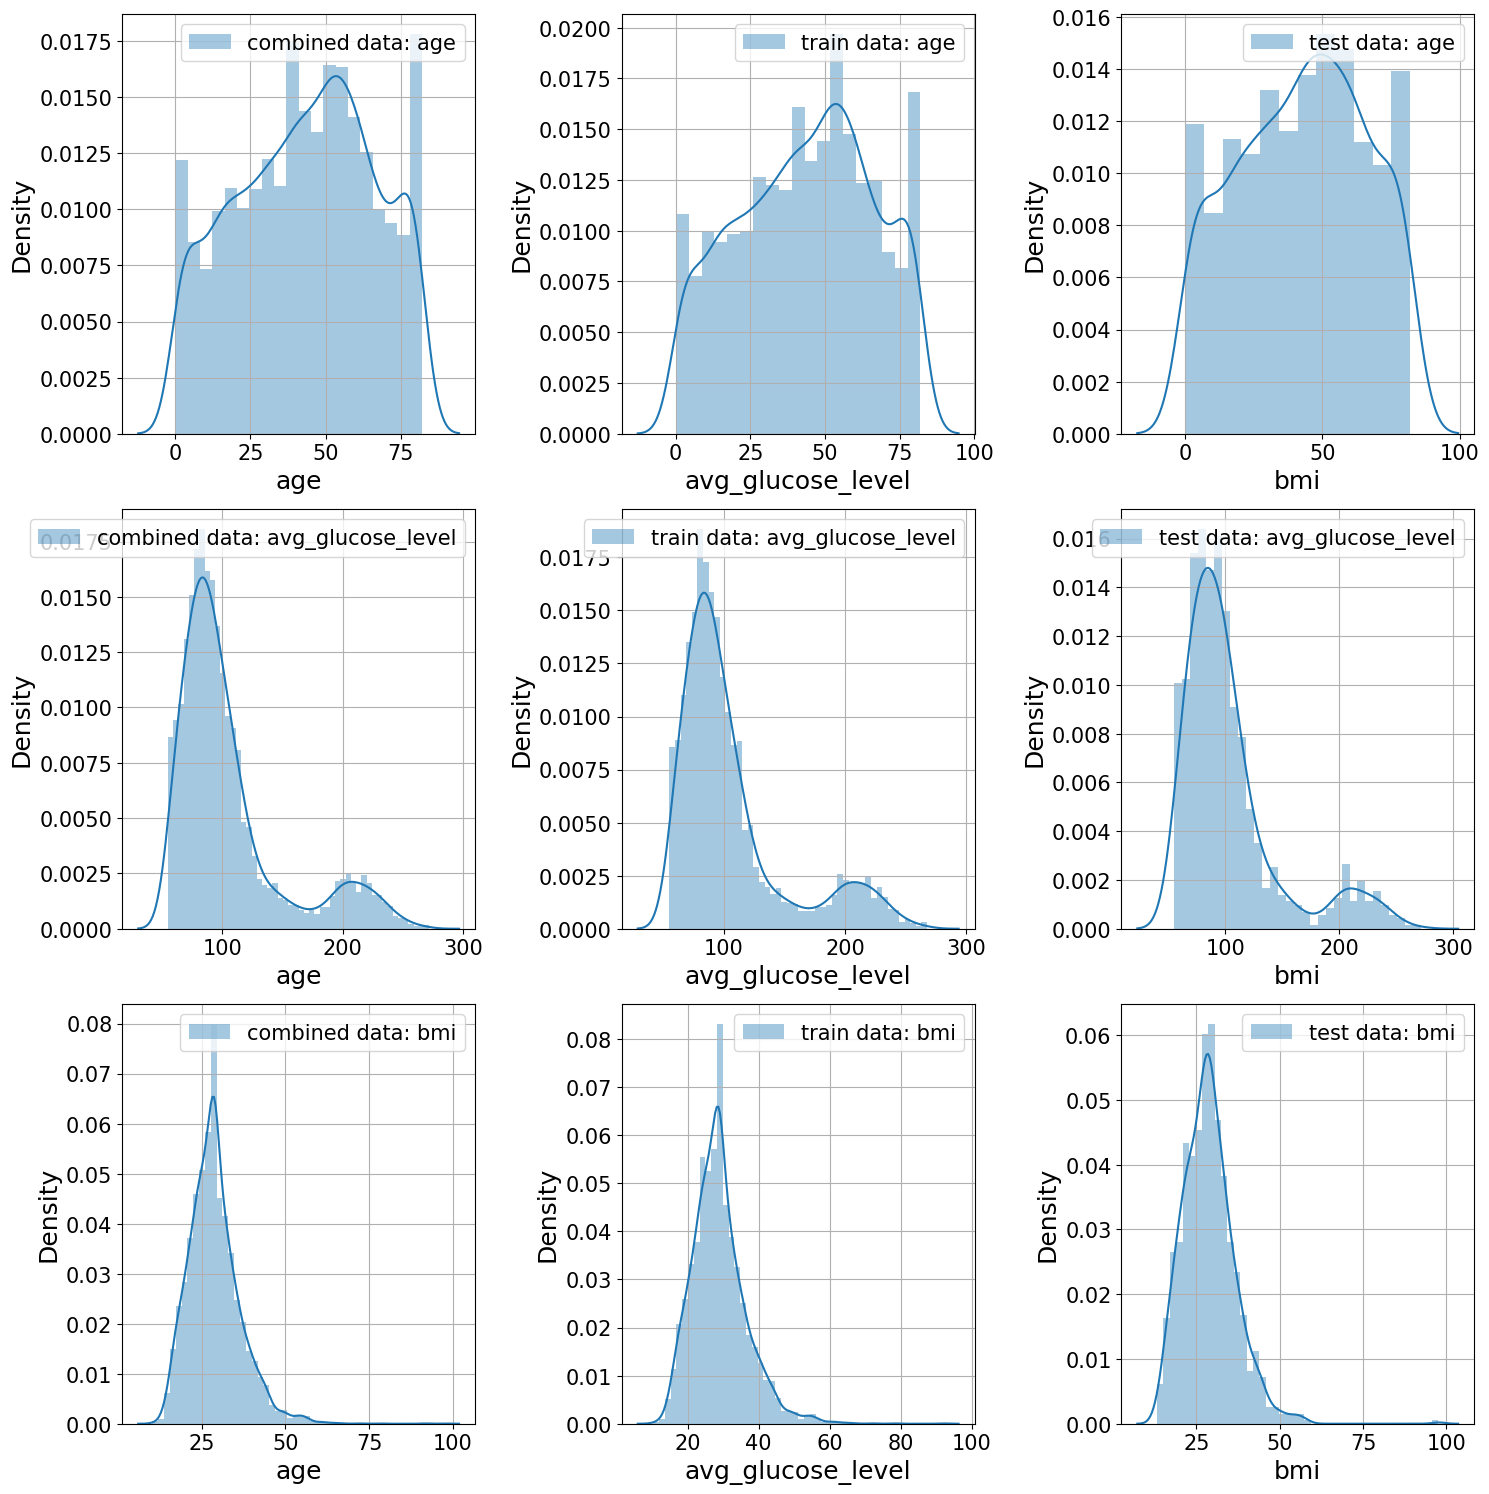

In [200]:
# show histograms of some variables on train and test data
import random
random.seed(123)

columns_sample = random.sample(columns_con, 3)

fig, axss = plt.subplots(nrows= len(columns_sample), ncols=3,  figsize=(15,5*len(columns_sample)))

for i, axs in enumerate(axss):
    x1 = df[columns_sample[i]]
    x2 = X_train[columns_sample[i]]
    x3 = X_test[columns_sample[i]]
    sns.distplot(x1, ax=axs[0], label= f'combined data: {columns_sample[i]}')
    sns.distplot(x2, ax=axs[1], label= f'train data: {columns_sample[i]}')
    sns.distplot(x3, ax=axs[2], label= f'test data: {columns_sample[i]}')
    ylabel = f'Density'
    for j, ax in enumerate(axs):
        ax.set_ylabel(ylabel, size=18)
        ax.set_xlabel(f'{columns_sample[j]}', size=18)
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.grid()
        ax.legend(fontsize = 15, loc = 1)
        
fig.tight_layout()
plt.show()

In [201]:
X_train_con = X_train[columns_con].copy()
col_train_cat = list(set(X_train.columns.tolist())-set(X_train_con.columns.tolist()))
X_train_cat = X_train[col_train_cat].copy()
X_test_con = X_test[columns_con].copy()
X_test_cat = X_test[col_train_cat].copy()

In [202]:
# standardize the dataset
from sklearn.preprocessing import StandardScaler
# TODO: define a scaler and use the training dataset to fit the scaler

scaler = StandardScaler()
scaler.fit(X_test_con);

# TODO: print out the mean and variance of each feature, obtained from the scaler.
[print(f'feature: {x[0]:25s} mean: {x[1]:7.02f} {(" ")*5} variance: {x[2]: 9.02f}') for x in zip(columns_con, scaler.mean_, scaler.var_)];

# TODO: then transfer the raw data to scaled data (for both training and testing dataset)
X_train_con_scaled = pd.DataFrame(scaler.transform(X_train_con), columns = columns_con)
X_test_con_scaled = pd.DataFrame(scaler.transform(X_test_con), columns = columns_con)

X_train = pd.concat([X_train_cat, X_train_con_scaled], axis=1)
X_test = pd.concat([X_test_cat, X_test_con_scaled], axis=1)

feature: age                       mean:   42.58       variance:    539.76
feature: avg_glucose_level         mean:  103.85       variance:   1857.54
feature: bmi                       mean:   28.77       variance:     61.81


In [203]:
df_train = pd.concat([X_train, y_train], axis = 1)

In [204]:
df0 = df_train[df_train['stroke'] == 0].copy()
df1 = df_train[df_train['stroke'] == 1].copy()
df0.shape, df1.shape

((3889, 20), (199, 20))

In [205]:
df1_mod = df1.copy()

In [206]:
# df1_mod = pd.concat([df1, df1, df1, df1, df1])

In [207]:
df1_mod.shape

(199, 20)

In [208]:
df0_mod = df0.sample(n = 150)
df_train_mod = pd.concat([df0_mod, df1_mod])
df_train_mod = df_train_mod.sample(frac=1)
X_train = df_train_mod[X_train.columns]
y_train = df_train_mod[y_train.columns]

In [209]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score

# list the models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier

In [210]:
key = []
value = []
model_family = []
random_state = 123

## LogisticRegression
name = 'LogReg'
count = 1
for c in [0.01, 0.1, 1.0, 10]:
    for tol in [1e-4, 1e-3, 1e-2, 1e-1]:
        key.append(f'{name}_{count}')
        count += 1
        value.append(LogisticRegression(random_state=random_state, C = c, tol = tol))

## KNeighborsClassifier
name = 'KNN'
count = 1
for p in [1,2,3,4]:
    for n_neighbors in [3,5,7,9]:
        key.append(f'{name}_{count}')
        count += 1
        value.append(KNeighborsClassifier(n_neighbors= n_neighbors, p = p))

## SVC
name = 'SVC'
count = 1
for c in [0.1, 1.0, 10]:
    for tol in [1e-4, 1e-3, 1e-2, 1e-1]:
        for deg in [2, 3]:
            key.append(f'{name}_{count}')
            count += 1
            value.append(SVC(random_state=random_state, C = c, tol = tol, degree = deg))

In [211]:
key += ['DT','RF','GradBoost','XGB', 'AdaBoost']
value += [DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), xgb.XGBClassifier(), AdaBoostClassifier()]
models = dict(zip(key,value))

In [212]:
models

{'LogReg_1': LogisticRegression(C=0.01, random_state=123),
 'LogReg_2': LogisticRegression(C=0.01, random_state=123, tol=0.001),
 'LogReg_3': LogisticRegression(C=0.01, random_state=123, tol=0.01),
 'LogReg_4': LogisticRegression(C=0.01, random_state=123, tol=0.1),
 'LogReg_5': LogisticRegression(C=0.1, random_state=123),
 'LogReg_6': LogisticRegression(C=0.1, random_state=123, tol=0.001),
 'LogReg_7': LogisticRegression(C=0.1, random_state=123, tol=0.01),
 'LogReg_8': LogisticRegression(C=0.1, random_state=123, tol=0.1),
 'LogReg_9': LogisticRegression(random_state=123),
 'LogReg_10': LogisticRegression(random_state=123, tol=0.001),
 'LogReg_11': LogisticRegression(random_state=123, tol=0.01),
 'LogReg_12': LogisticRegression(random_state=123, tol=0.1),
 'LogReg_13': LogisticRegression(C=10, random_state=123),
 'LogReg_14': LogisticRegression(C=10, random_state=123, tol=0.001),
 'LogReg_15': LogisticRegression(C=10, random_state=123, tol=0.01),
 'LogReg_16': LogisticRegression(C=10, r

In [220]:
t1 = time.time()
prediction_acc =[]
mean_training_scores = []
trained_models = []
training_time = []
auc = []

# train the models and get prediction accuracy
for name,algo in models.items():
    # record start time
    start = time.time()
    model=algo
    model.fit(X_train,y_train)
    temp_time = (time.time()-start) * 1000
    training_time.append(temp_time)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    temp_auc = roc_auc_score(y_test, predict)
    prediction_acc.append(acc)
    auc.append(temp_auc)
    trained_models.append(model)
    mean_training_score = np.mean(cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5))
    mean_training_scores.append(mean_training_score)
    print(f'model: {name:15s} mean_training_score: {mean_training_score:.5f} {(" ")*4} prediction_acc: {acc:.5f} {(" ")*4} time: {temp_time:.2f} ms {(" ")*4} AUC: {temp_auc:.2f}')
#     print(name,acc)
#     print(f'{name:25s}')
t2 = time.time()
print(f'time taken: {(t2-t1)*1000} ms')

model: LogReg_1        mean_training_score: 0.75052      prediction_acc: 0.60763      time: 8.55 ms      AUC: 0.75
model: LogReg_2        mean_training_score: 0.75052      prediction_acc: 0.60763      time: 5.14 ms      AUC: 0.75
model: LogReg_3        mean_training_score: 0.75052      prediction_acc: 0.60763      time: 3.58 ms      AUC: 0.75
model: LogReg_4        mean_training_score: 0.75052      prediction_acc: 0.60861      time: 2.78 ms      AUC: 0.75
model: LogReg_5        mean_training_score: 0.75048      prediction_acc: 0.68982      time: 3.99 ms      AUC: 0.75
model: LogReg_6        mean_training_score: 0.75048      prediction_acc: 0.68982      time: 4.43 ms      AUC: 0.75
model: LogReg_7        mean_training_score: 0.75048      prediction_acc: 0.68982      time: 3.59 ms      AUC: 0.75
model: LogReg_8        mean_training_score: 0.75048      prediction_acc: 0.68982      time: 5.58 ms      AUC: 0.75
model: LogReg_9        mean_training_score: 0.75035      prediction_acc: 0.70352

In [221]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.4f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [227]:
prediction_acc_df = pd.DataFrame()
prediction_acc_df['model'] = key
prediction_acc_df['model_family'] = [k.split('_')[0] for k in key]
prediction_acc_df['accuracy_test'] = prediction_acc
prediction_acc_df['training_time'] = training_time
prediction_acc_df['AUC'] = auc
prediction_acc_df.sort_values(by= ['accuracy_test'], ascending= False, inplace= True)
prediction_acc_df.set_index(['model', 'training_time', 'AUC'], inplace= True)
prediction_acc_df.drop_duplicates(inplace= True)
prediction_acc_df.reset_index(inplace= True, drop= False)
prediction_acc_df.head(10)

,model,training_time,AUC,model_family,accuracy_test
0,LogReg_16,5.810022,0.740309,LogReg,0.704501
1,LogReg_10,6.821871,0.749280,LogReg,0.703523
2,LogReg_12,4.048347,0.748251,LogReg,0.701566
3,LogReg_5,3.990650,0.751564,LogReg,0.689824
4,AdaBoost,67.409992,0.697449,AdaBoost,0.677104
5,SVC_15,4.148006,0.750247,SVC,0.669276
6,SVC_9,4.534960,0.749733,SVC,0.668297
7,SVC_13,4.268885,0.749218,SVC,0.667319
8,DT,2.303839,0.663848,DT,0.667319
9,GradBoost,66.251040,0.710761,GradBoost,0.666341


In [223]:
prediction_acc_df.shape

(31, 3)

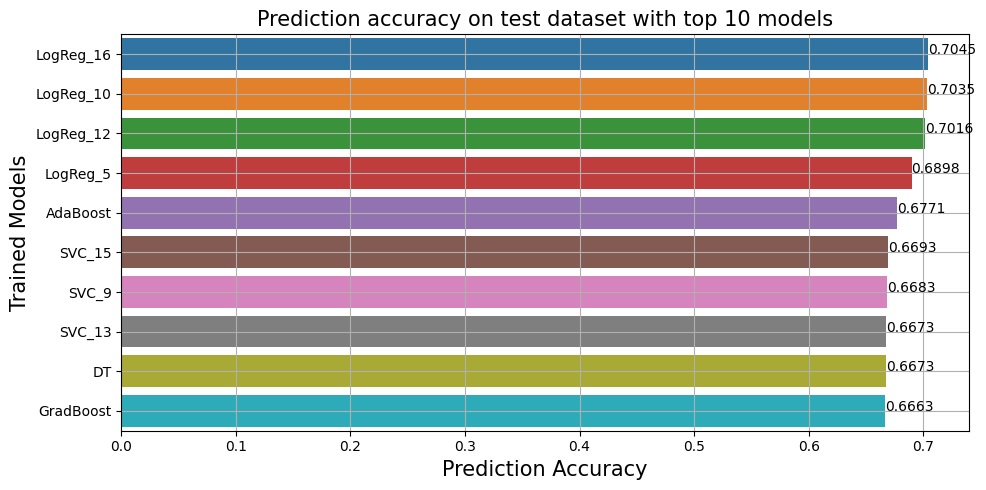

In [224]:
## best 10 models

fig = plt.figure(figsize = (10,5))
# ax = sns.barplot(x = prediction_acc, y = key, palette='pastel')
ax = sns.barplot(x = prediction_acc_df['accuracy_test'][:10], y = prediction_acc_df['model'][:10])
show_values(ax, "h", space=0)

plt.title('Prediction accuracy on test dataset with top 10 models', fontsize = 15)
plt.xlabel('Prediction Accuracy', fontsize = 15)
plt.ylabel('Trained Models', fontsize = 15)
plt.grid()
fig.tight_layout()
plt.show()

In [225]:
# select the best model
print("Highest prediction_acc: {}".format(max(prediction_acc)))
print(f"Best model: {key[prediction_acc.index(max(prediction_acc))]}", trained_models[prediction_acc.index(max(prediction_acc))].get_params())

Highest prediction_acc: 0.7045009784735812
Best model: LogReg_16 {'C': 10, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 123, 'solver': 'lbfgs', 'tol': 0.1, 'verbose': 0, 'warm_start': False}


Accuracy: 0.7045
Precision: 0.1182
Recall: 0.7800
F1 Score: 0.2053
Sensitivity: 0.7800
Specificity: 0.7006
Missclassification: 0.2955


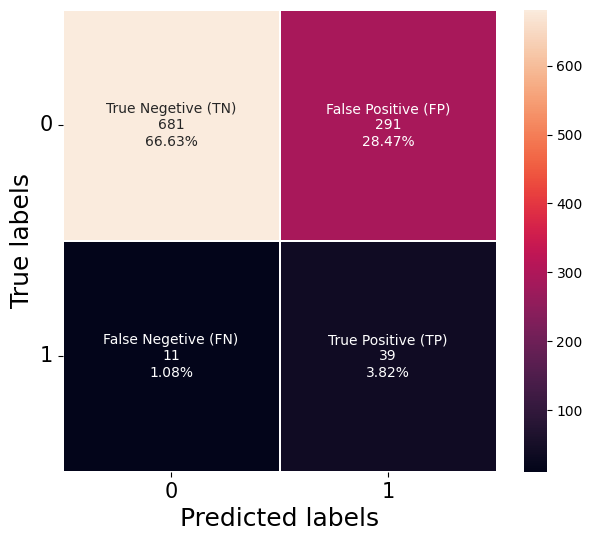

In [226]:
#confusion matrix
trained_model = trained_models[prediction_acc.index(max(prediction_acc))]
y_pred = trained_model.predict(X_test)
cf_matrix=confusion_matrix(y_test,y_pred)

(TN, FP, FN, TP) = cf_matrix.ravel()
accuracy = (TN+TP)/float(TN+FP+TP+FN)
precision = TP / float(TP+FP)
recall = TP / float(TP+FN)
f1score = 2*precision*recall/float(precision+recall)
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
Missclassification = 1-accuracy

print(f'Accuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1 Score: {f1score:.4f}\nSensitivity: {sensitivity:.4f}\nSpecificity: {specificity:.4f}\nMissclassification: {Missclassification:.4f}')

plt.figure(figsize=(7,6))

group_names = ['True Negetive (TN)','False Positive (FP)','False Negetive (FN)','True Positive (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', linewidths=0.1, linecolor='white')

# sns.heatmap(cf_matrix,annot=True,fmt='d')
plt.xlabel('Predicted labels', fontsize = 18)
plt.ylabel('True labels', fontsize = 18)
plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15, rotation=0)
plt.show()


references:
    1. https://www.kaggle.com/code/juanpee/brain-failure-prediction
    2. https://www.kaggle.com/code/hasibalmuzdadid/brain-stroke-analysis-accuracy-96-03
    3. https://www.kaggle.com/code/ahmedterry/stroke-prediction-eda-classification-models